## Data Visualizations Using MIMIC-III Clinical Database

All visualizations in this presentation are based on datasets from the **MIMIC-III Clinical Database**, a publicly available and comprehensive resource containing **deidentified health data from over 40,000 patients** who received critical care at **Beth Israel Deaconess Medical Center** between **2001 and 2012**.

### Overview of Visualizations

Below are **five distinct visualizations**, each providing insights into different aspects of clinical data:

1. **Sunburst Chart** – Displays the **top drug prescriptions** categorized by **age group**.
2. **Stacked Bar Chart** – Illustrates **opioid prescription distributions** across different **races and age groups**.
3. **Heatmap** – Scores the **susceptibility and resistance** between various **organisms and antibiotics**.
4. **Step Chart** – Shows the **average hospital stay duration** for **procedures**, broken down by **insurance type**.
5. **Sankey Diagram** – Highlights the relationships between **five high-risk procedures, race, and fatality**.

For more details, access the **Google Colab notebook** here:  
[GitHub Repo](https://github.com/Dominick99/AI-395T)


In [4]:
from google.colab import files
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

In [12]:
# Upload the file
d1 = files.upload()

# Read only the required columns
microbiologyevents = pd.read_csv(
    'MICROBIOLOGYEVENTS.csv.gz',
    compression='gzip')

# Display the first few rows to confirm
microbiologyevents.head()

Saving MICROBIOLOGYEVENTS.csv.gz to MICROBIOLOGYEVENTS.csv.gz


,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,SPEC_ITEMID,SPEC_TYPE_DESC,ORG_ITEMID,ORG_NAME,ISOLATE_NUM,AB_ITEMID,AB_NAME,DILUTION_TEXT,DILUTION_COMPARISON,DILUTION_VALUE,INTERPRETATION
0,744,96,170324,2156-04-13 00:00:00,2156-04-13 14:18:00,70021.0,BRONCHOALVEOLAR LAVAGE,80026.0,PSEUDOMONAS AERUGINOSA,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,745,96,170324,2156-04-20 00:00:00,2156-04-20 13:10:00,70062.0,SPUTUM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,746,96,170324,2156-04-20 00:00:00,2156-04-20 16:00:00,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,747,96,170324,2156-04-20 00:00:00,NaN,70012.0,BLOOD CULTURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,748,96,170324,2156-04-20 00:00:00,NaN,70079.0,URINE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Upload the file
d2 = files.upload()

# Read only the required column
admissions = pd.read_csv(
    'ADMISSIONS.csv.gz',
    compression='gzip')

# Display the first few rows to confirm
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


In [5]:
# Upload the file
d3 = files.upload()

# Read only the required column
prescriptions = pd.read_csv(
    'PRESCRIPTIONS.csv.gz',
    compression='gzip')

# Display the first few rows to confirm
prescriptions.head()

Saving PRESCRIPTIONS.csv.gz to PRESCRIPTIONS.csv.gz


<ipython-input-5-3807f24fe591>:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  prescriptions = pd.read_csv(


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [8]:
# Upload the file
d4 = files.upload()

# Read only the required column
patients = pd.read_csv(
    'PATIENTS.csv.gz',
    compression='gzip')

# Display the first few rows to confirm
patients.head()

Saving PATIENTS.csv.gz to PATIENTS.csv.gz


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


In [14]:
# Upload the file
d5 = files.upload()

# Read only the required column
procedures_icd = pd.read_csv(
    'PROCEDURES_ICD.csv.gz',
    compression='gzip')

# Display the first few rows to confirm
procedures_icd.head()

Saving PROCEDURES_ICD.csv.gz to PROCEDURES_ICD.csv.gz


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,944,62641,154460,3,3404
1,945,2592,130856,1,9671
2,946,2592,130856,2,3893
3,947,55357,119355,1,9672
4,948,55357,119355,2,331


In [15]:
# Upload the file
d6 = files.upload()

# Read only the required column
d_icd_procedures = pd.read_csv(
    'D_ICD_PROCEDURES.csv.gz',
    compression='gzip')

# Display the first few rows to confirm
d_icd_procedures.head()

Saving D_ICD_PROCEDURES.csv.gz to D_ICD_PROCEDURES.csv.gz


,ROW_ID,ICD9_CODE,SHORT_TITLE,LONG_TITLE
0,264,851,Canthotomy,Canthotomy
1,265,852,Blepharorrhaphy,Blepharorrhaphy
2,266,859,Adjust lid position NEC,Other adjustment of lid position
3,267,861,Lid reconst w skin graft,Reconstruction of eyelid with skin flap or graft
4,268,862,Lid reconst w muc graft,Reconstruction of eyelid with mucous membrane ...


In [64]:
# Upload the file
d7 = files.upload()

# Read only the required columns
procedureevents_mv = pd.read_csv(
    'PROCEDUREEVENTS_MV.csv.gz',
    compression='gzip')

# Display the first few rows to confirm
procedureevents_mv.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,VALUE,VALUEUOM,LOCATION,...,ORDERCATEGORYNAME,SECONDARYORDERCATEGORYNAME,ORDERCATEGORYDESCRIPTION,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE
0,379,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225401,1.0,NaN,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
1,380,29070,115071,232563.0,2145-03-12 23:04:00,2145-03-12 23:05:00,225454,1.0,NaN,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
2,381,29070,115071,232563.0,2145-03-12 23:05:00,2145-03-18 20:01:00,225792,8456.0,hour,NaN,...,Ventilation,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN
3,382,29070,115071,232563.0,2145-03-12 23:36:00,2145-03-12 23:37:00,225402,1.0,NaN,NaN,...,Procedures,NaN,Electrolytes,0,0,0,FinishedRunning,NaN,NaN,NaN
4,383,29070,115071,232563.0,2145-03-13 01:27:00,2145-03-16 16:00:00,224560,5193.0,min,Right IJ,...,Invasive Lines,NaN,Task,1,0,0,FinishedRunning,NaN,NaN,NaN


In [6]:
def process_age_data(df, start_date_col, dob_col):
    """
    Processes a DataFrame to calculate age and age groups based on two date columns.

    Parameters:
        df (pd.DataFrame): The DataFrame containing date columns.
        start_date_col (str): Column name for the start date.
        dob_col (str): Column name for the date of birth.

    Returns:
        pd.DataFrame: A cleaned DataFrame with 'AGE' and 'AGE_GROUP' columns added.
    """
    df = df.copy()  # Avoid modifying the original DataFrame

    # Ensure date columns are in datetime format
    df[start_date_col] = pd.to_datetime(df[start_date_col], errors='coerce')
    df[dob_col] = pd.to_datetime(df[dob_col], errors='coerce')

    # Calculate 'AGE'
    df['AGE'] = (
        df[start_date_col].dt.year - df[dob_col].dt.year -
        ((df[start_date_col].dt.month < df[dob_col].dt.month) |
         ((df[start_date_col].dt.month == df[dob_col].dt.month) &
          (df[start_date_col].dt.day < df[dob_col].dt.day)))
    )

    # Filter out unrealistic ages (0 to 120) and create a new copy
    df = df[(df['AGE'] >= 0) & (df['AGE'] <= 120)].copy()

    # Define age group bins and labels
    bins = [0, 20, 40, 60, 80, 100]
    labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

    df['AGE_GROUP'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

    return df


In [9]:
# Create a copy of prescriptions with only required columns
prescriptions_copy = prescriptions[['SUBJECT_ID', 'STARTDATE', 'ENDDATE', 'DRUG']].copy()

# Merge with patients data to add DOB and GENDER
prescriptions_copy = prescriptions_copy.merge(
    patients[['SUBJECT_ID', 'DOB', 'GENDER']],
    on='SUBJECT_ID',
    how='left'
)

# Drop rows with NaN values in either date column
prescriptions_copy.dropna(inplace=True)

# Drop duplicate rows
prescriptions_copy.drop_duplicates(inplace=True)

prescriptions_copy = process_age_data(prescriptions_copy, 'STARTDATE', 'DOB')

# Display the first few rows
prescriptions_copy.head()


,SUBJECT_ID,STARTDATE,ENDDATE,DRUG,DOB,GENDER,AGE,AGE_GROUP
0,6,2175-06-11,2175-06-12 00:00:00,Tacrolimus,2109-06-21,F,65,61-80
1,6,2175-06-11,2175-06-12 00:00:00,Warfarin,2109-06-21,F,65,61-80
2,6,2175-06-11,2175-06-12 00:00:00,Heparin Sodium,2109-06-21,F,65,61-80
3,6,2175-06-11,2175-06-12 00:00:00,D5W,2109-06-21,F,65,61-80
4,6,2175-06-11,2175-06-12 00:00:00,Furosemide,2109-06-21,F,65,61-80


In [10]:
import plotly.express as px

# Count the top 3 prescribed drugs within each age group and gender
top_drugs = (
    prescriptions_copy.groupby(['AGE_GROUP', 'GENDER', 'DRUG'])
    .size()
    .reset_index(name='COUNT')
)

# Select the top 3 drugs per age group and gender
top_drugs = top_drugs.sort_values(['AGE_GROUP', 'GENDER', 'COUNT'], ascending=[True, True, False])
top_drugs = top_drugs.groupby(['AGE_GROUP', 'GENDER']).head(3)

# Create a hierarchical sunburst chart
fig = px.sunburst(
    top_drugs,
    path=['AGE_GROUP', 'GENDER', 'DRUG'],
    values='COUNT',
    title='Top 3 Prescribed Drugs by Age-Gender Group')

# Display the chart
fig.show()


<ipython-input-10-13077798fea8>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prescriptions_copy.groupby(['AGE_GROUP', 'GENDER', 'DRUG'])
<ipython-input-10-13077798fea8>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_drugs = top_drugs.groupby(['AGE_GROUP', 'GENDER']).head(3)
/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfg = df.groupby(path[

In [17]:
# List of common opioid keywords
opioid_keywords = ["OXYCODONE", "HYDROCODONE", "MORPHINE", "FENTANYL", "CODEINE", "HYDROMORPHONE", "METHADONE", "BUPRENORPHINE", "TRAMADOL"]

# Filter prescriptions_copy to only include rows where 'DRUG' contains any of the opioid keywords
prescriptions_opioids = prescriptions_copy[
    prescriptions_copy['DRUG'].str.contains('|'.join(opioid_keywords), case=False, na=False)
].copy()

prescriptions_opioids = prescriptions_opioids.merge(
    admissions[['SUBJECT_ID', 'ETHNICITY']],
    on='SUBJECT_ID',
    how='left'
)

# Remove rows with NaN values
prescriptions_opioids.dropna(inplace=True)

# Remove duplicate rows
prescriptions_opioids.drop_duplicates(inplace=True)

# List of ethnicities to exclude
excluded_ethnicities = ['UNKNOWN/NOT SPECIFIED', 'PATIENT DECLINED TO ANSWER', 'UNABLE TO OBTAIN']

# Remove rows with excluded ethnicities
prescriptions_opioids = prescriptions_opioids[~prescriptions_opioids['ETHNICITY'].isin(excluded_ethnicities)]

# Function to standardize ethnicity values
def simplify_ethnicity(ethnicity):
    ethnicity = ethnicity.upper()
    if 'WHITE' in ethnicity:
        return 'WHITE'
    elif 'BLACK' in ethnicity or 'AFRICAN' in ethnicity:
        return 'BLACK'
    elif 'HISPANIC' in ethnicity or 'LATINO' in ethnicity:
        return 'HISPANIC'
    elif 'ASIAN' in ethnicity:
        return 'ASIAN'
    elif 'AMERICAN INDIAN' in ethnicity:
        return 'AMERICAN INDIAN'
    elif 'PACIFIC ISLANDER' in ethnicity:
        return 'PACIFIC ISLANDER'
    else:
        return ethnicity  # Keep other values as is

# Apply the function to create the RACE column
prescriptions_opioids['RACE'] = prescriptions_opioids['ETHNICITY'].apply(simplify_ethnicity)

# Count occurrences of each race
race_counts = prescriptions_opioids['RACE'].value_counts()

# Filter out races with less than 1000 instances
sufficient_races = race_counts[race_counts >= 1000].index

# Keep only rows where RACE is in the sufficient races list
prescriptions_opioids = prescriptions_opioids[prescriptions_opioids['RACE'].isin(sufficient_races)]

# Display the filtered dataset
prescriptions_opioids.head()


<ipython-input-17-94ffb5d4ffdc>:46: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SUBJECT_ID,STARTDATE,ENDDATE,DRUG,DOB,GENDER,AGE,AGE_GROUP,ETHNICITY,RACE
0,13,2167-01-09,2167-01-12 00:00:00,Oxycodone-Acetaminophen,2127-02-27,F,39,21-40,WHITE,WHITE
1,13,2167-01-09,2167-01-12 00:00:00,Morphine Sulfate,2127-02-27,F,39,21-40,WHITE,WHITE
2,4,2191-03-16,2191-03-23 00:00:00,Guaifenesin-Codeine Phosphate,2143-05-12,F,47,41-60,WHITE,WHITE
3,6,2175-05-30,2175-06-01 00:00:00,Morphine Sulfate,2109-06-21,F,65,61-80,WHITE,WHITE
4,6,2175-05-30,2175-06-03 00:00:00,Hydromorphone,2109-06-21,F,65,61-80,WHITE,WHITE


<ipython-input-18-328921dbbc4a>:4: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



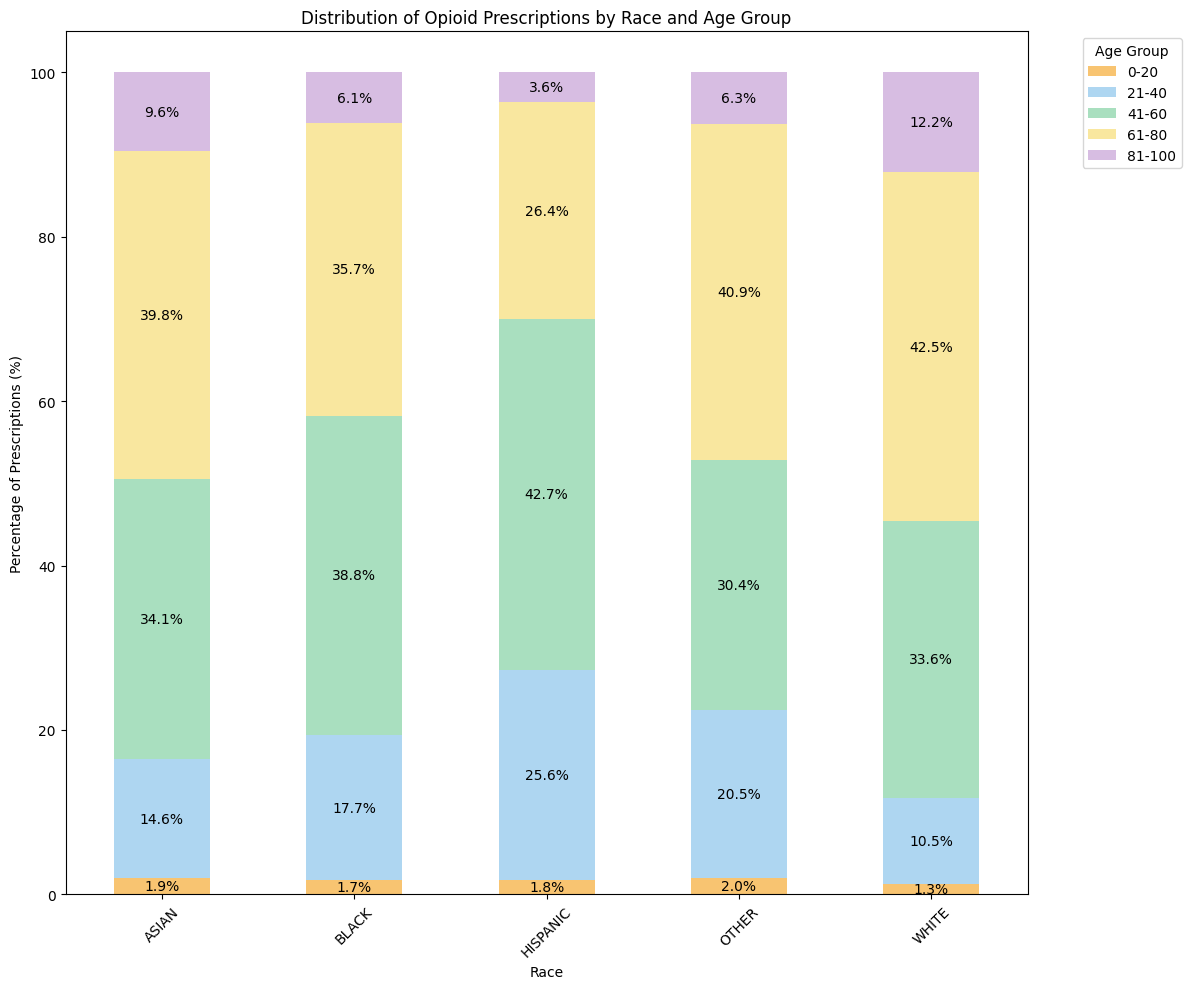

In [18]:
from matplotlib import colors

# Count occurrences of AGE_GROUP within each RACE
age_race_counts = prescriptions_opioids.groupby(['RACE', 'AGE_GROUP']).size().unstack(fill_value=0)

# Convert counts to percentages within each RACE
age_race_percentage = age_race_counts.div(age_race_counts.sum(axis=1), axis=0) * 100

# Define a list of light colors
light_colors = ["#f8c471", "#aed6f1", "#a9dfbf", "#f9e79f", "#d7bde2"]

# Create a custom colormap
custom_cmap = colors.ListedColormap(light_colors)

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 10))
age_race_percentage.plot(kind='bar', stacked=True, ax=ax, colormap=custom_cmap, width=0.5)

# Define a threshold for showing labels
label_threshold = 0  # Only show labels for segments larger than 5%

# Add percentage labels inside each bar if they're big enough
for i, race in enumerate(age_race_percentage.index):
    bottom = 0  # Track the bottom of each segment
    for age_group in age_race_percentage.columns:
        percentage = age_race_percentage.loc[race, age_group]
        if percentage > label_threshold:  # Only display if greater than threshold
            ax.text(i, bottom + percentage / 2, f"{percentage:.1f}%",
                    ha='center', va='center', fontsize=10, color='black')
        bottom += percentage

# Label axes and title
ax.set_ylabel("Percentage of Prescriptions (%)")
ax.set_xlabel("Race")
ax.set_title("Distribution of Opioid Prescriptions by Race and Age Group")
ax.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Create a copy of the relevant columns from microbiologyevents
microbiologyevents_copy = microbiologyevents[['SUBJECT_ID', 'CHARTDATE', 'ORG_NAME', 'AB_NAME', 'INTERPRETATION']].copy()

# Remove rows where interpretation is still pending
microbiologyevents_copy = microbiologyevents_copy[microbiologyevents_copy['INTERPRETATION'] != 'P']

# Map interpretations to numerical values
interpretation_map = {'S': 0, 'I': 1, 'R': 2}
microbiologyevents_copy['INTERPRETATION_SCORE'] = microbiologyevents_copy['INTERPRETATION'].map(interpretation_map)

microbiologyevents_copy = microbiologyevents_copy.merge(
    patients[['SUBJECT_ID', 'DOB']],
    on='SUBJECT_ID',
    how='left'
)

# Drop all rows with ANY missing values across all columns
microbiologyevents_copy = microbiologyevents_copy.dropna()

# Drop duplicate rows
microbiologyevents_copy = microbiologyevents_copy.drop_duplicates()

# Count occurrences of each ORG_NAME and AB_NAME
org_counts = microbiologyevents_copy['ORG_NAME'].value_counts()
ab_counts = microbiologyevents_copy['AB_NAME'].value_counts()

# Keep only ORG_NAMEs and AB_NAMEs that appear at least 1000 times
valid_orgs = org_counts[org_counts >= 1000].index
valid_abs = ab_counts[ab_counts >= 1000].index

# Filter the dataframe
microbiologyevents_copy = microbiologyevents_copy[microbiologyevents_copy['ORG_NAME'].isin(valid_orgs)]

microbiologyevents_copy = microbiologyevents_copy[microbiologyevents_copy['AB_NAME'].isin(valid_abs)]

microbiologyevents_copy = process_age_data(microbiologyevents_copy, 'CHARTDATE', 'DOB')

# Display the first few rows
microbiologyevents_copy.head()

<ipython-input-25-ba2cde39d771>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,SUBJECT_ID,CHARTDATE,ORG_NAME,AB_NAME,INTERPRETATION,INTERPRETATION_SCORE,DOB,AGE,AGE_GROUP
27,106,2192-08-09,STAPH AUREUS COAG +,GENTAMICIN,S,0.0,2164-04-01,28,21-40
28,106,2192-08-09,STAPH AUREUS COAG +,OXACILLIN,S,0.0,2164-04-01,28,21-40
29,106,2192-08-09,STAPH AUREUS COAG +,ERYTHROMYCIN,R,2.0,2164-04-01,28,21-40
30,106,2192-08-09,STAPH AUREUS COAG +,PENICILLIN,R,2.0,2164-04-01,28,21-40
31,106,2192-08-09,STAPH AUREUS COAG +,LEVOFLOXACIN,S,0.0,2164-04-01,28,21-40


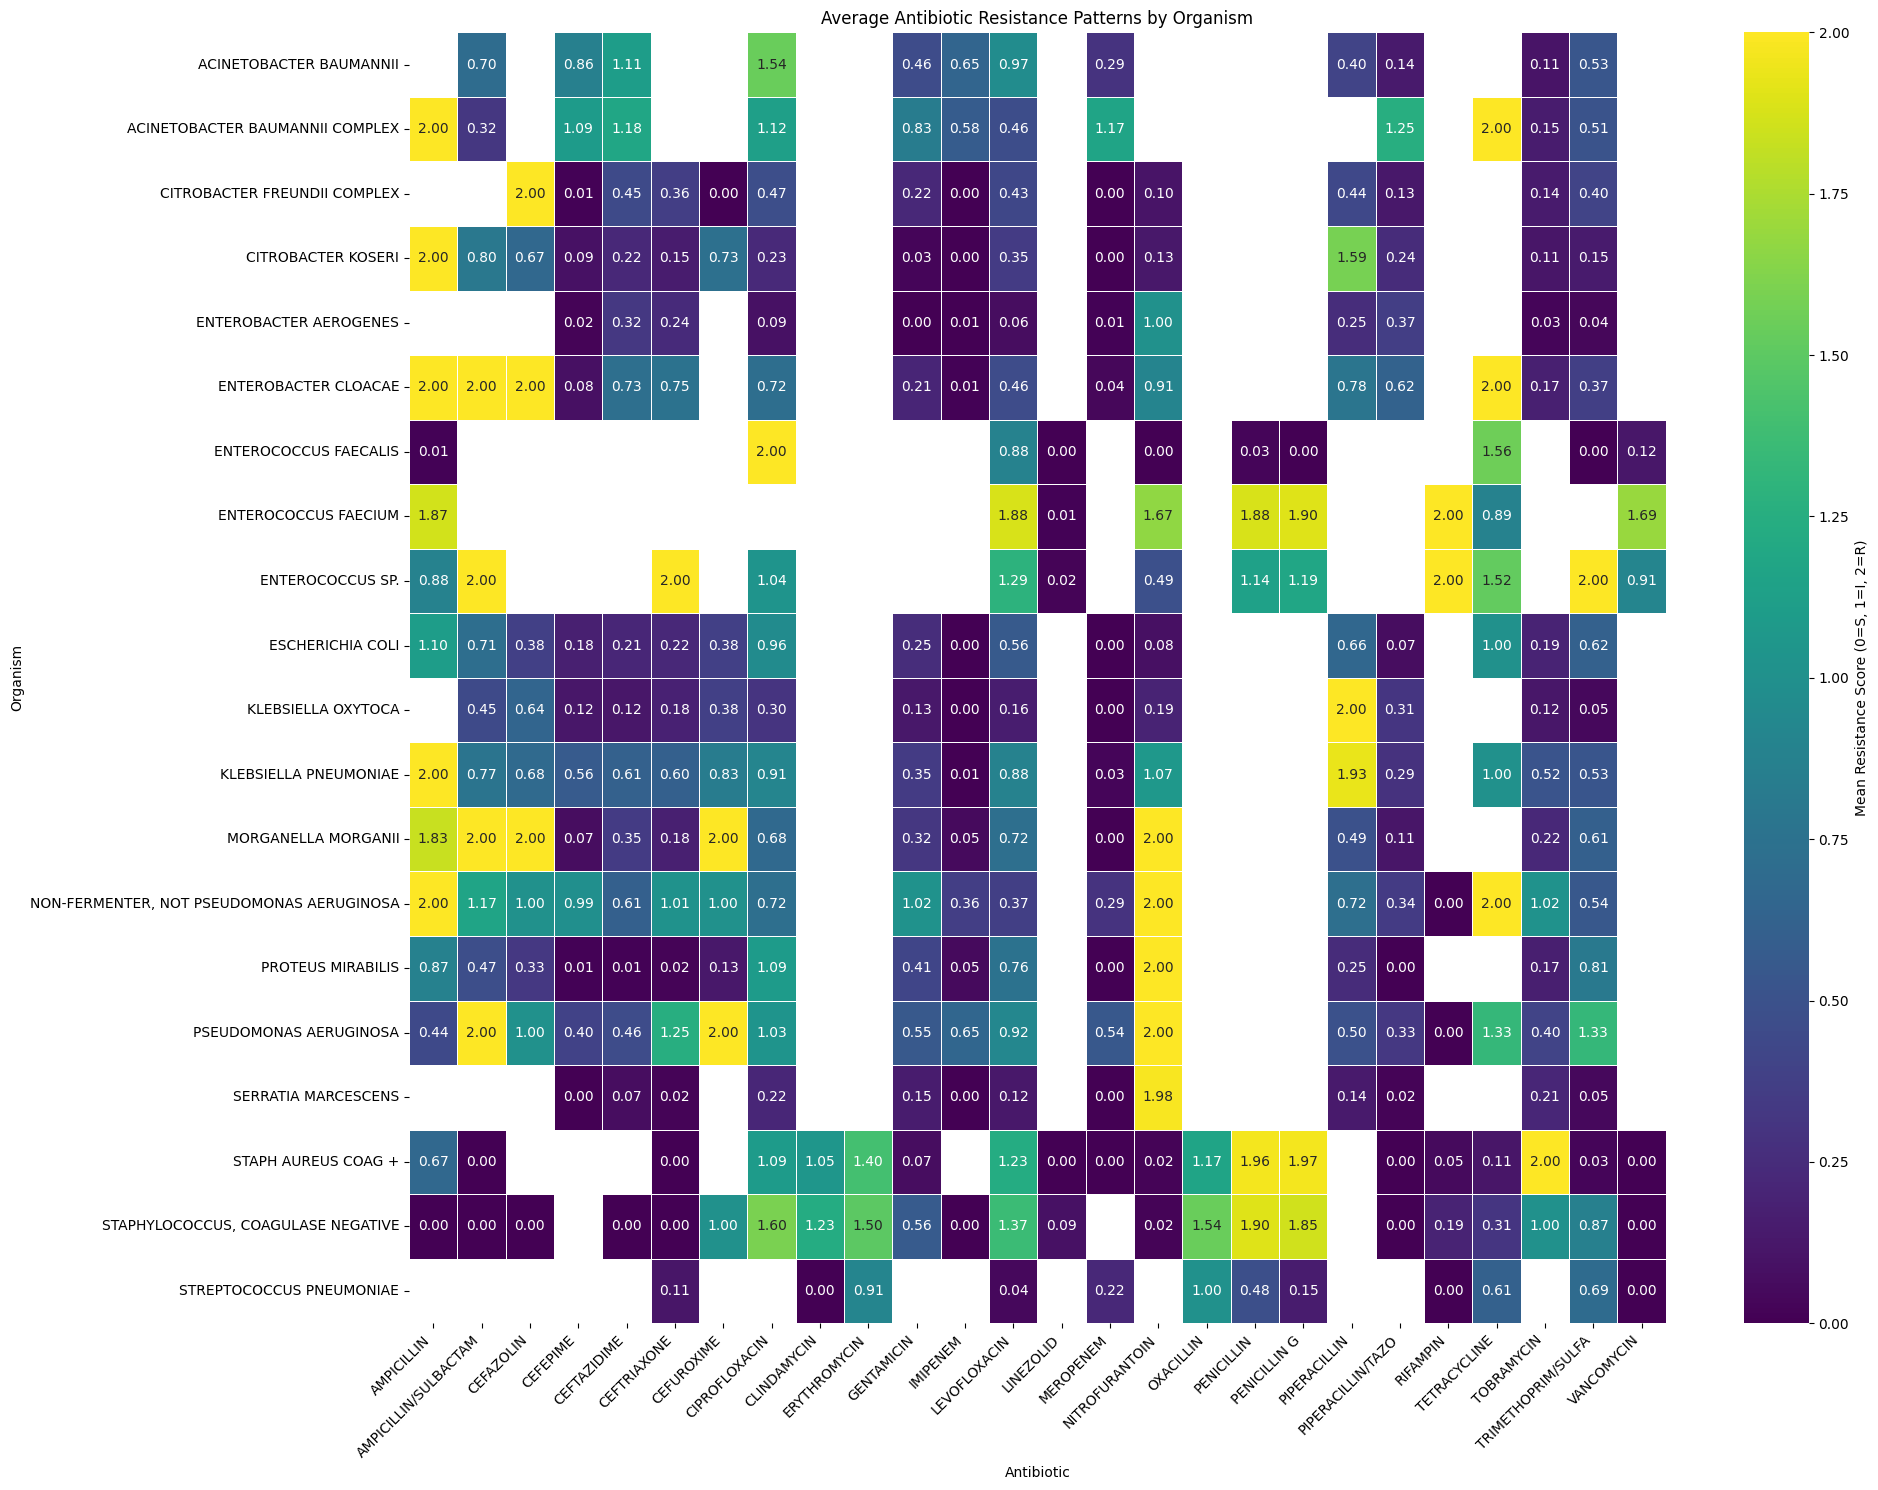

In [26]:
# Create pivot table with mean scores
pivot_table = microbiologyevents_copy.pivot_table(
    values='INTERPRETATION_SCORE',
    index='ORG_NAME',
    columns='AB_NAME',
    aggfunc='mean',
    fill_value=None  # Keep NaN for combinations with no data
)

# Create the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(
    pivot_table,
    cmap='viridis',
    annot=True,
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Mean Resistance Score (0=S, 1=I, 2=R)'}
)

plt.title('Average Antibiotic Resistance Patterns by Organism')
plt.xlabel('Antibiotic')
plt.ylabel('Organism')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [119]:
def assign_decade(df, date_col):
    """
    Assigns a decade to each row based on the year in the given date column.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    date_col (str): The column name containing dates.

    Returns:
    pd.DataFrame: DataFrame with a new column `DECADE` indicating the decade.
    """
    # Ensure the date column is in datetime format
    df[date_col] = pd.to_datetime(df[date_col])

    # Extract the year
    df['YEAR'] = df[date_col].dt.year

    # Find earliest and latest years
    earliest_year = df['YEAR'].min()
    latest_year = df['YEAR'].max()

    print(f"Earliest Year: {earliest_year}, Latest Year: {latest_year}")

    # Calculate the decade (round down to nearest 10)
    df['DECADE'] = (df['YEAR'] // 10) * 10

    return df

def calculate_elapsed_time(df, start_time_col, end_time_col, unit='seconds'):
    """
    Calculates the elapsed time between start and end time columns in the specified unit.

    Parameters:
    df (pd.DataFrame): The input DataFrame.
    start_time_col (str): The column name for the start times.
    end_time_col (str): The column name for the end times.
    unit (str): The unit of time for elapsed time ('seconds', 'minutes', 'hours', 'days').

    Returns:
    pd.DataFrame: DataFrame with a new column `ELAPSED_TIME` containing the elapsed time in the specified unit.
    """
    # Ensure the start and end time columns are in datetime format
    df[start_time_col] = pd.to_datetime(df[start_time_col])
    df[end_time_col] = pd.to_datetime(df[end_time_col])

    # Calculate the elapsed time in seconds
    elapsed_time = (df[end_time_col] - df[start_time_col]).dt.total_seconds()

    # Convert to the requested unit
    if unit == 'minutes':
        elapsed_time /= 60
    elif unit == 'hours':
        elapsed_time /= 3600
    elif unit == 'days':
        elapsed_time /= 86400
    elif unit != 'seconds':
        raise ValueError("Invalid unit. Choose from 'seconds', 'minutes', 'hours', or 'days'.")

    # Store in new column
    df['ELAPSED_TIME'] = elapsed_time

    return df

In [155]:
procedures_time = procedures_icd.copy()

procedures_time = procedures_time.merge(
    admissions[['HADM_ID', 'ADMITTIME', 'DISCHTIME', 'ADMISSION_TYPE', 'INSURANCE', 'ETHNICITY', 'HOSPITAL_EXPIRE_FLAG']],
    on='HADM_ID',
    how='left',
)

procedures_time = procedures_time.dropna()
procedures_time = procedures_time.drop_duplicates()

procedures_time = calculate_elapsed_time(procedures_time, 'ADMITTIME', 'DISCHTIME', unit='days')
procedures_time = assign_decade(procedures_time, 'ADMITTIME')

procedures_time.head()

Earliest Year: 2100, Latest Year: 2210


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,HOSPITAL_EXPIRE_FLAG,ELAPSED_TIME,YEAR,DECADE
0,944,62641,154460,3,3404,2143-07-23 07:15:00,2143-07-30 14:55:00,ELECTIVE,Medicaid,UNKNOWN/NOT SPECIFIED,0,7.319444,2143,2140
1,945,2592,130856,1,9671,2183-06-05 21:02:00,2183-06-16 14:23:00,EMERGENCY,Medicare,WHITE,0,10.722917,2183,2180
2,946,2592,130856,2,3893,2183-06-05 21:02:00,2183-06-16 14:23:00,EMERGENCY,Medicare,WHITE,0,10.722917,2183,2180
3,947,55357,119355,1,9672,2187-06-08 02:24:00,2187-06-29 17:09:00,URGENT,Private,BLACK/AFRICAN AMERICAN,0,21.614583,2187,2180
4,948,55357,119355,2,331,2187-06-08 02:24:00,2187-06-29 17:09:00,URGENT,Private,BLACK/AFRICAN AMERICAN,0,21.614583,2187,2180


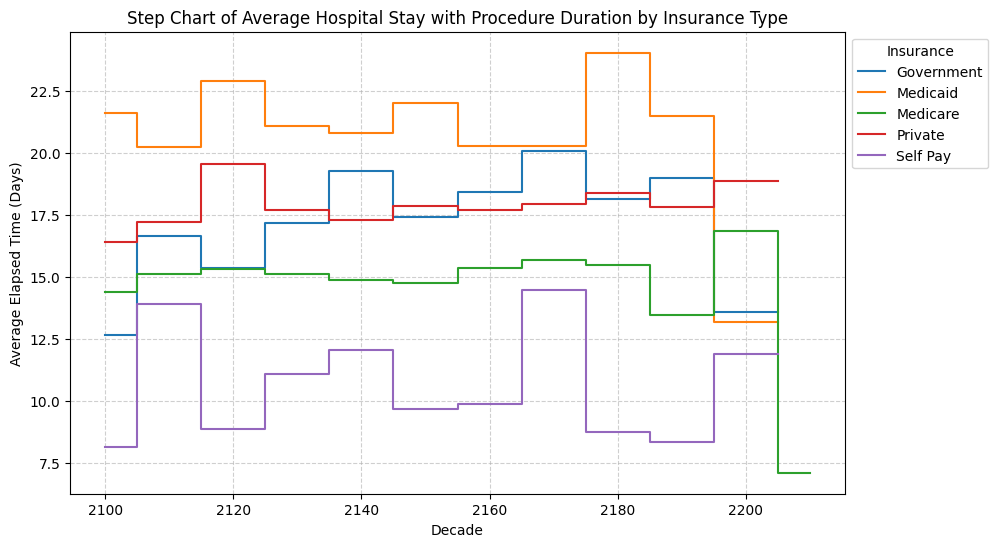

In [156]:
import numpy as np


# Group by DECADE and INSURANCE, then compute the mean of ELAPSED_TIME
grouped = procedures_time.groupby(['DECADE', 'INSURANCE'])['ELAPSED_TIME'].mean().reset_index()

# Pivot the table for easier plotting
pivot_df = grouped.pivot(index='DECADE', columns='INSURANCE', values='ELAPSED_TIME')

# Plot step chart
plt.figure(figsize=(10, 6))
for insurance in pivot_df.columns:
    plt.step(pivot_df.index, pivot_df[insurance], label=insurance, where='mid')

plt.xlabel('Decade')
plt.ylabel('Average Elapsed Time (Days)')
plt.title('Step Chart of Average Hospital Stay with Procedure Duration by Insurance Type')
plt.legend(title='Insurance', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [180]:
procedures_fatality = procedures_time.copy()

# List of ethnicities to exclude
excluded_ethnicities = ['UNKNOWN/NOT SPECIFIED', 'PATIENT DECLINED TO ANSWER', 'UNABLE TO OBTAIN']

# Remove rows with excluded ethnicities
procedures_fatality = procedures_fatality[~procedures_fatality['ETHNICITY'].isin(excluded_ethnicities)]

procedures_fatality['RACE'] = procedures_fatality['ETHNICITY'].apply(simplify_ethnicity)

race_counts = procedures_fatality['RACE'].value_counts()

# Filter out races with less than 1000 instances
sufficient_races = race_counts[race_counts >= 1000].index

procedures_fatality = procedures_fatality[procedures_fatality['RACE'].isin(sufficient_races)]

procedures_fatality = procedures_fatality.merge(
    d_icd_procedures[['ICD9_CODE', 'SHORT_TITLE']],
    on='ICD9_CODE',
    how='left',
)

procedures_fatality.dropna()
procedures_fatality.drop_duplicates()

# Filter out ICD9 codes with less than 100 occurrences
icd9_counts = procedures_fatality['ICD9_CODE'].value_counts()
frequent_icd9 = icd9_counts[icd9_counts >= 100].index
procedures_filtered = procedures_fatality[procedures_fatality['ICD9_CODE'].isin(frequent_icd9)]

# Calculate fatality rate per ICD9 code
fatality_rates = (
    procedures_filtered.groupby('ICD9_CODE')['HOSPITAL_EXPIRE_FLAG']
    .mean()
    .sort_values(ascending=False)
)

# Get the top 5 most fatal ICD9 codes
top_5_fatal_icd9 = fatality_rates.head(5).index

# Filter out rows that do not have one of the top 5 most fatal ICD9 codes
procedures_filtered = procedures_filtered[procedures_filtered['ICD9_CODE'].isin(top_5_fatal_icd9)]


procedures_fatality.head()

,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE,ADMITTIME,DISCHTIME,ADMISSION_TYPE,INSURANCE,ETHNICITY,HOSPITAL_EXPIRE_FLAG,ELAPSED_TIME,YEAR,DECADE,RACE,SHORT_TITLE
0,945,2592,130856,1,9671,2183-06-05 21:02:00,2183-06-16 14:23:00,EMERGENCY,Medicare,WHITE,0,10.722917,2183,2180,WHITE,Cont inv mec ven <96 hrs
1,946,2592,130856,2,3893,2183-06-05 21:02:00,2183-06-16 14:23:00,EMERGENCY,Medicare,WHITE,0,10.722917,2183,2180,WHITE,Venous cath NEC
2,947,55357,119355,1,9672,2187-06-08 02:24:00,2187-06-29 17:09:00,URGENT,Private,BLACK/AFRICAN AMERICAN,0,21.614583,2187,2180,BLACK,Cont inv mec ven 96+ hrs
3,948,55357,119355,2,331,2187-06-08 02:24:00,2187-06-29 17:09:00,URGENT,Private,BLACK/AFRICAN AMERICAN,0,21.614583,2187,2180,BLACK,Spinal tap
4,948,55357,119355,2,331,2187-06-08 02:24:00,2187-06-29 17:09:00,URGENT,Private,BLACK/AFRICAN AMERICAN,0,21.614583,2187,2180,BLACK,Incision of lung


In [182]:
import plotly.graph_objects as go
# Get unique labels
short_titles = procedures_filtered['SHORT_TITLE'].unique().tolist()
races = procedures_filtered['RACE'].unique().tolist()
expire_flags = ['Survived', 'Expired']

labels = short_titles + races + expire_flags

# Map label names to indices
label_indices = {label: i for i, label in enumerate(labels)}

# Initialize link lists
source = []
target = []
value = []

### Normalize SHORT_TITLE → RACE as percentages ###
short_title_race_counts = procedures_filtered.groupby(['SHORT_TITLE', 'RACE']).size().reset_index(name='count')

# Convert counts to percentages within each procedure
short_title_totals = short_title_race_counts.groupby('SHORT_TITLE')['count'].transform('sum')
short_title_race_counts['percentage'] = short_title_race_counts['count'] / short_title_totals * 100

for _, row in short_title_race_counts.iterrows():
    source.append(label_indices[row['SHORT_TITLE']])
    target.append(label_indices[row['RACE']])
    value.append(row['percentage'])  # Use percentages instead of counts

### Normalize RACE → HOSPITAL_EXPIRE_FLAG as percentages ###
race_expire_counts = procedures_filtered.groupby(['RACE', 'HOSPITAL_EXPIRE_FLAG']).size().reset_index(name='count')

# Convert counts to percentages within each race
race_totals = race_expire_counts.groupby('RACE')['count'].transform('sum')
race_expire_counts['percentage'] = race_expire_counts['count'] / race_totals * 100

for _, row in race_expire_counts.iterrows():
    source.append(label_indices[row['RACE']])
    target.append(label_indices[expire_flags[row['HOSPITAL_EXPIRE_FLAG']]])
    value.append(row['percentage'])  # Use percentages instead of counts

# Create the Sankey diagram
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
    )
))

# Update layout and show
fig.update_layout(title_text="Normalized Sankey Diagram: Procedure → Race → Fatality (Percentages)", font_size=12)
fig.show()